In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
print("Loading dataset...")
try:
    data = pd.read_csv('/content/Churn_Modelling.csv')
except FileNotFoundError:
    print("Error: Dataset file not found. Please make sure the file exists in the correct location.")
    print("You can specify the full path to your file by modifying the code.")
    exit(1)
except Exception as e:
    print(f"Error loading dataset: {e}")
    exit(1)

Loading dataset...


In [4]:
print("Dataset Overview:")
print(f"Shape: {data.shape}")
print("\nData Types:")
print(data.dtypes)
print("\nMissing Values:")
print(data.isnull().sum())
print("\nDescriptive Statistics:")
print(data.describe())

Dataset Overview:
Shape: (10000, 14)

Data Types:
RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

Missing Values:
RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Descriptive Statistics:
         RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38

In [5]:
# Check column names in the loaded dataset
print("Dataset columns:", data.columns.tolist())
non_predictive_columns = []
for col in ['RowNumber', 'CustomerId', 'Surname', 'ID', 'Customer_ID', 'Name']:
    if col in data.columns:
        non_predictive_columns.append(col)

df = data.drop(non_predictive_columns, axis=1) if non_predictive_columns else data.copy()
print(f"Dropped non-predictive columns: {non_predictive_columns}")

possible_target_columns = ['Exited', 'Churn', 'IsChurned', 'Churned', 'Attrition', 'Status']
target_column = None

for col in possible_target_columns:
    if col in df.columns:
        target_column = col
        break

if not target_column:
    print("Could not identify the target column (churn indicator).")
    print("Available columns:", df.columns.tolist())
    target_column = input("Please enter the name of the target column: ")

Dataset columns: ['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']
Dropped non-predictive columns: ['RowNumber', 'CustomerId', 'Surname']


In [6]:
# Define features and target variable
X = df.drop(target_column, axis=1)
y = df[target_column]

print(f"Target variable: {target_column}")
print(f"Features: {X.columns.tolist()}")

# Split data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nTraining set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

# Define preprocessing for numerical and categorical features
# Auto-detect numerical and categorical features
numerical_features = []
categorical_features = []


Target variable: Exited
Features: ['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']

Training set shape: (8000, 10)
Testing set shape: (2000, 10)


In [7]:
for col in X.columns:
    if X[col].dtype in ['int64', 'float64']:
        numerical_features.append(col)
    else:
        categorical_features.append(col)

print(f"\nIdentified numerical features: {numerical_features}")
print(f"Identified categorical features: {categorical_features}")


Identified numerical features: ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']
Identified categorical features: ['Geography', 'Gender']


In [8]:
# Create transformers for numerical and categorical features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine transformers into a preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create model pipelines
models = {
    'Logistic Regression': Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', LogisticRegression(random_state=42, max_iter=1000))
    ]),
    'Random Forest': Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', RandomForestClassifier(random_state=42))
    ]),
    'Gradient Boosting': Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', GradientBoostingClassifier(random_state=42))
    ])
}


Training Logistic Regression...
Logistic Regression Accuracy: 81.10%

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.55      0.20      0.29       393

    accuracy                           0.81      2000
   macro avg       0.69      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000



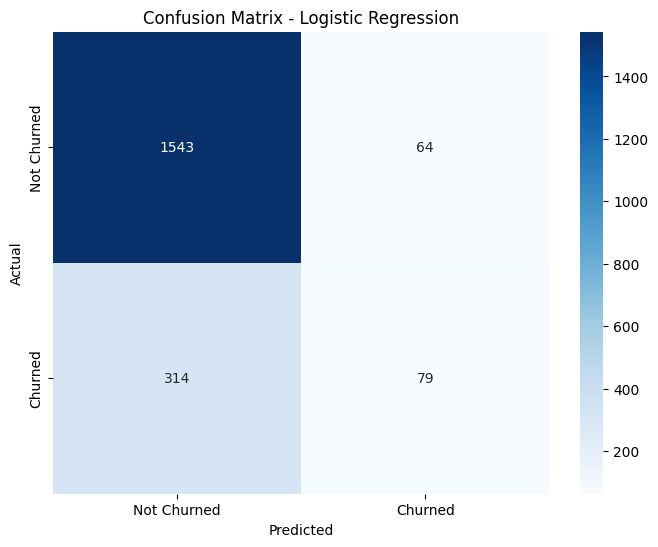


Training Random Forest...
Random Forest Accuracy: 86.35%

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.46      0.57       393

    accuracy                           0.86      2000
   macro avg       0.81      0.71      0.75      2000
weighted avg       0.85      0.86      0.85      2000



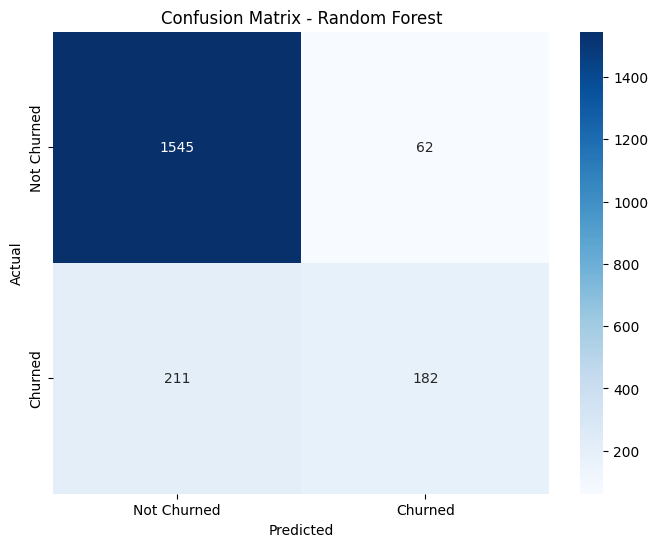


Training Gradient Boosting...
Gradient Boosting Accuracy: 86.40%

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.74      0.47      0.58       393

    accuracy                           0.86      2000
   macro avg       0.81      0.72      0.75      2000
weighted avg       0.85      0.86      0.85      2000



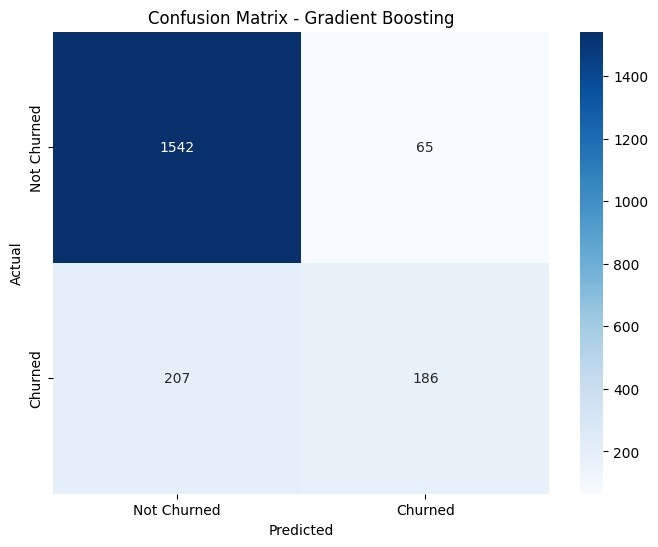


Logistic Regression - Actual vs Predicted:
      Actual  Predicted
6252       0          0
4684       0          0
1731       0          0
4742       0          0
4521       0          0
...      ...        ...
6412       1          0
8285       0          0
7853       1          0
1095       1          0
6929       1          0

[2000 rows x 2 columns]

Random Forest - Actual vs Predicted:
      Actual  Predicted
6252       0          0
4684       0          0
1731       0          0
4742       0          0
4521       0          0
...      ...        ...
6412       1          1
8285       0          0
7853       1          1
1095       1          0
6929       1          0

[2000 rows x 2 columns]

Gradient Boosting - Actual vs Predicted:
      Actual  Predicted
6252       0          0
4684       0          0
1731       0          0
4742       0          0
4521       0          0
...      ...        ...
6412       1          1
8285       0          0
7853       1          1
1095      

In [9]:
# Train models and make predictions
results = {}
for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = {
        'model': model,
        'accuracy': accuracy,
        'y_pred': y_pred
    }

    print(f"{name} Accuracy: {accuracy * 100:.2f}%")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Display confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Not Churned', 'Churned'],
                yticklabels=['Not Churned', 'Churned'])
    plt.title(f'Confusion Matrix - {name}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

# Display actual vs predicted values for each model
for name, result in results.items():
    print(f"\n{name} - Actual vs Predicted:")
    comparison_df = pd.DataFrame({
        'Actual': y_test,
        'Predicted': result['y_pred']
    })
    print(comparison_df)


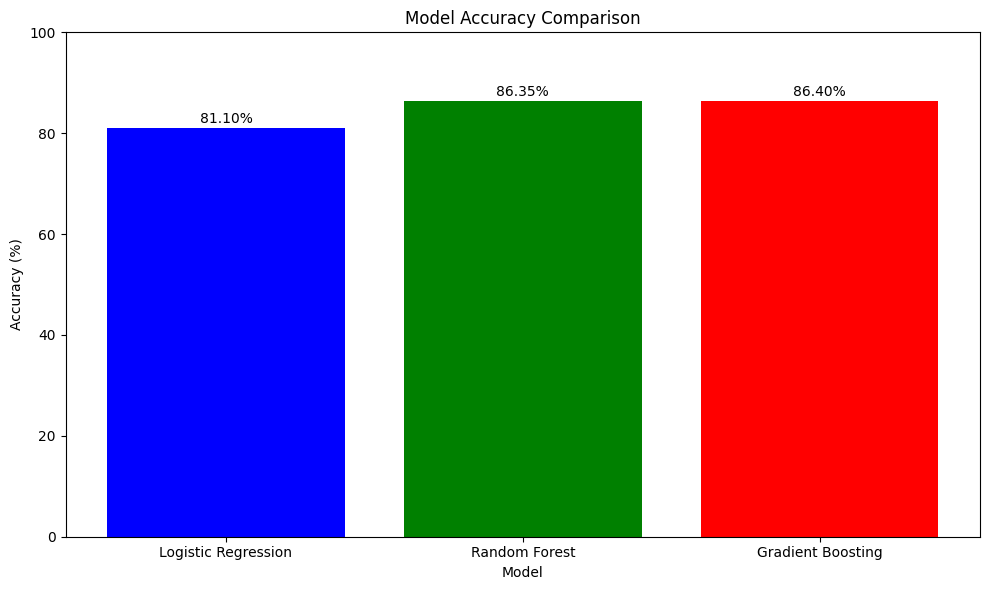


Best Model: Gradient Boosting with accuracy 86.40%


In [10]:
# Compare model accuracies
accuracies = {name: result['accuracy'] * 100 for name, result in results.items()}
plt.figure(figsize=(10, 6))
plt.bar(accuracies.keys(), accuracies.values(), color=['blue', 'green', 'red'])
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.ylim(0, 100)
for i, (name, accuracy) in enumerate(accuracies.items()):
    plt.text(i, accuracy + 1, f"{accuracy:.2f}%", ha='center')
plt.tight_layout()
plt.show()

# Select the best model based on accuracy
best_model_name = max(results, key=lambda x: results[x]['accuracy'])
best_model = results[best_model_name]['model']
print(f"\nBest Model: {best_model_name} with accuracy {accuracies[best_model_name]:.2f}%")

In [11]:
# Function to predict churn for new customer data
def predict_churn(model, new_data):

    if isinstance(new_data, dict):
        new_data = pd.DataFrame([new_data])
    prediction = model.predict(new_data)
    probability = model.predict_proba(new_data)
    return {
        'prediction': 'Churn' if prediction[0] == 1 else 'No Churn',
        'probability': probability[0][1]
    }

# Function to get user input for a new customer
def get_user_input():
    print("\nEnter customer details for churn prediction:")

    customer_data = {}
    for feature in numerical_features:
        try:
            if 'age' in feature.lower():
                customer_data[feature] = int(input(f"{feature} (e.g., 42): "))
            elif any(term in feature.lower() for term in ['balance', 'salary', 'income']):
                customer_data[feature] = float(input(f"{feature} (e.g., 100000.00): "))
            elif any(term in feature.lower() for term in ['card', 'member', 'active', 'product']):
                customer_data[feature] = int(input(f"{feature} (1=Yes, 0=No): "))
            else:
                customer_data[feature] = float(input(f"{feature}: "))
        except ValueError:
            print(f"Invalid input for {feature}. Using default value of 0.")
            customer_data[feature] = 0
    for feature in categorical_features:
        unique_values = X[feature].unique().tolist()
        values_str = '/'.join(map(str, unique_values))
        customer_data[feature] = input(f"{feature} ({values_str}): ")

    return customer_data


In [12]:

# Get user input for a new customer
try:
    print("\nWould you like to predict churn for a new customer? (yes/no)")
    choice = input().lower()

    if choice == 'yes':
        new_customer = get_user_input()
        result = predict_churn(best_model, new_customer)

        print("\nPrediction Result:")
        print(f"Prediction: {result['prediction']}")
        print(f"Churn Probability: {result['probability'] * 100:.2f}%")
    else:
        print("Thank you for using the churn prediction model!")
except Exception as e:
    print(f"An error occurred: {e}")
    print("Please make sure you enter valid input values.")

# Feature importance analysis for the best model
if best_model_name != 'Logistic Regression':
    feature_names = (
        numerical_features +
        list(best_model.named_steps['preprocessor']
             .transformers_[1][1]
             .named_steps['onehot']
             .get_feature_names_out(categorical_features))
    )
    if best_model_name == 'Random Forest':
        importances = best_model.named_steps['classifier'].feature_importances_
        indices = np.argsort(importances)[::-1]

        plt.figure(figsize=(12, 8))
        plt.title('Feature Importance')
        plt.bar(range(len(importances)), importances[indices], align='center')
        plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=90)
        plt.tight_layout()
        plt.show()

        print("\nTop 5 Most Important Features:")
        for i in range(5):
            print(f"{feature_names[indices[i]]}: {importances[indices[i]]:.4f}")


Would you like to predict churn for a new customer? (yes/no)
yes

Enter customer details for churn prediction:
CreditScore: 222
Age (e.g., 42): 22
Tenure: 2
Balance (e.g., 100000.00): 6000
NumOfProducts (1=Yes, 0=No): 3
HasCrCard (1=Yes, 0=No): 1
IsActiveMember (1=Yes, 0=No): 1
EstimatedSalary (e.g., 100000.00): 5000
Geography (France/Spain/Germany): Germany
Gender (Female/Male): Female

Prediction Result:
Prediction: Churn
Churn Probability: 80.77%
